In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [24]:
# Atlanta Data
csv_path = "Resources/AtlMoon.csv"
atl_df = pd.read_csv(csv_path)
atl_df.head()

,Date,Crime Count,Moon Phase,Special,Special Type
0,1/1/15,87.0,NaN,NaN,NaN
1,1/10/15,71.0,NaN,NaN,NaN
2,1/11/15,82.0,NaN,NaN,NaN
3,1/12/15,95.0,NaN,NaN,NaN
4,1/13/15,64.0,Third Quarter,n,NaN


In [74]:
new_df = atl_df.groupby(['Moon Phase'])['Crime Count'].sum()
new_df

Moon Phase
First Quarter     985.0
Full Moon        1081.0
New Moon          987.0
Third Quarter    1001.0
Name: Crime Count, dtype: float64

Text(0, 0.5, 'Crime Count')

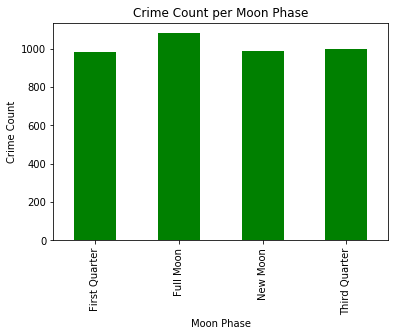

In [75]:
crime_moon_graph = new_df.plot(kind="bar", color="green")

plt.title('Crime Count per Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Crime Count')

In [79]:
# Crime Count Vs Visible Moon (%) Linear Regression
x_values = ['Crime Count']
y_values = ['Moon Visibility']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 200)

plt.ylabel("Moon Visibility")
plt.xlabel("Crime Count")
plt.show()

# plt.savefig("CrimeVsMoonViz.png")

TypeError: cannot perform reduce with flexible type